##### 광고 제거
- 크롤링 파일 로드

In [231]:
from tqdm import tqdm
tqdm.pandas()
#data['doc']=data['doc'].progress_apply(lambda x : clean_text(x))

In [232]:
import pandas as pd
import numpy as np

#크롤링 데이터 불러오기
#본인이 크롤링한 파일 업로드
data=pd.read_csv('(2022-12-14)_스타일닷컴.csv')
data

,리뷰내용,별점,리뷰동조자수
0,업뎃을 할 수록 정확성이 떨어지네요. 품절인 상품에 sold out 표시 안되는 경...,3,19
1,피드백 1. 느림 관심상품(하트)하려면 3초 뒤쯤 등록완료 됨. 3초 짧지만 써보면...,3,13
2,"앱 자체는 괜찮습니다. 보세가 아닌 브랜드만을 모아 볼 수 있는 점과 브랜드 별, ...",3,12
3,아 일단 앱자체가 굉장히 깔끔하고 잘 정리되어 있어서 편리하다는 말을 하고싶습니다 ...,5,5
4,브랜드상품들 한번에 모아볼 수 있어서 좋아요. 그런데 상품이미지가 안나오는 것들이 ...,4,11
...,...,...,...
4748,앵간,4,0
4749,좋아용,5,0
4750,😆,5,0
4751,👍👍👍,5,0


#필요없는 컬럼 삭제
del data['Unnamed: 0']
data.info()

In [233]:
len(data)

4753

In [234]:
#중복행 제거
data.drop_duplicates(inplace=True)
len(data)

3760

In [235]:
#결측치 개수 확인
data.isnull().sum()

리뷰내용      0
별점        0
리뷰동조자수    0
dtype: int64

In [236]:
data

,리뷰내용,별점,리뷰동조자수
0,업뎃을 할 수록 정확성이 떨어지네요. 품절인 상품에 sold out 표시 안되는 경...,3,19
1,피드백 1. 느림 관심상품(하트)하려면 3초 뒤쯤 등록완료 됨. 3초 짧지만 써보면...,3,13
2,"앱 자체는 괜찮습니다. 보세가 아닌 브랜드만을 모아 볼 수 있는 점과 브랜드 별, ...",3,12
3,아 일단 앱자체가 굉장히 깔끔하고 잘 정리되어 있어서 편리하다는 말을 하고싶습니다 ...,5,5
4,브랜드상품들 한번에 모아볼 수 있어서 좋아요. 그런데 상품이미지가 안나오는 것들이 ...,4,11
...,...,...,...
4738,조아여...,5,0
4747,긋,5,0
4748,앵간,4,0
4750,😆,5,0


In [237]:
text = "".join(v for v in data['리뷰내용'])
text

'업뎃을 할 수록 정확성이 떨어지네요. 품절인 상품에 sold out 표시 안되는 경우↑/쇼핑몰에서 업뎃된 상품인데 스타일닷컴에서는 보이지 않는 경우↑/비슷한 상품 찾기의 결과 개수↑ but 비슷한 느낌↓/ 그리고) 가격대 설정이 만원대 단위라 튕기면 답이 없네요. 예를 들어 10,000원부터 시작해서 17,000까지 봤는데 튕기면 다시 10,000원부터 봐야됩니다. 천원대 단위, 아니면 적어도 오천원대 단위로 변경하면 좋겠습니다. 튕기는 게 고쳐질 것 같진 않으니 세부 기능이 진화할 수 밖에 없지 않을까요.피드백 1. 느림 관심상품(하트)하려면 3초 뒤쯤 등록완료 됨. 3초 짧지만 써보면 불편 2. 관심상품을 많이 보관 할 순 있지만 "관리" 할 수 없음 장점도 깍는 단점. 앱 자체에서 관심상품을 카테고리 별로 볼수 있도록 하던가 사용자가 직접 자신이 원하는 스타일, 카테고리로 관리 하도록 하던가 해야함(폴더형식처럼) 관리가 되지 않으니 많이 보관해봤자.. 3. 카테고리 선택을 중복으로 할 수 없다는 점 예로 신발, 가방을 한번에 보고 싶은데 중복선택이 안되니 각각 봐야함. 많이 불편한 사항은 아님. 하지만 단일선택만 가능한 것 보다 좋으면 좋지 나쁠건 없음. 장점 1. 필터로 세일 중인 상품만 보기와 상세검색이 가능 세일 중인 상품만 보기는 잘 사용하지 않지만 다른 앱에서 본적 없음, 언젠간 쓰일 기능. 또 원하는 카테고리만 봐도 샵이 많아 상품도 많은데 상세검색 잘 활용하면 원하는 제품 빨리 찾기 가능 2. 보세부터 명품 브랜드까지 샵의 스펙트럼이 넓음 장점더많은데글자수제한..앱 자체는 괜찮습니다. 보세가 아닌 브랜드만을 모아 볼 수 있는 점과 브랜드 별, 아이템 별 검색이 가능한 점 등이 이 앱이 기본적인 기능을 하고 있음을 느끼게 해줍니다. 다만 구매하려고 한 상품이 품절일 때도 목록에 그대로 노출되며, 별다른 안내가 없어 마치 무한 로딩처럼 보이는 점, 데이터 사용시 타 앱에 비해 소비량이 큰 점 등이 아쉽습니다.아 일단 앱자체가 굉장히 깔끔하고 잘

# 형태소 분석(pos-tagging)
- 텍스트 분석을 하기 위해서 단어의 형태로 데이터를 처리해줍니다
- 단어로 만드는 과정에서 1)분석에 불필요한 불용어 제거 2)단어를 사전형으로 처리(가고 있다->
'가다', '있다')
- 명사, 형용사, 동사, 부사의 품사만 분석 대상으로 선정

In [238]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk import word_tokenize

In [239]:
from konlpy.tag import Okt

In [240]:
#워드클라우드 import
from wordcloud import WordCloud

#워드를 카운팅해주는 라이브러리
from collections import Counter

#데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

In [241]:
from konlpy.tag import Okt
okt = Okt()

stopwords = ['있다', '하다', '되다', '수', '것', '거', '경우', '수록', '설정', '더', '볼', '정말', '보고', '때', '점'
            , '용', '눈', '싶다', '짱', '게', '개', '내', '네' ,'을', '함', '다만', '돼다', '순', '가끔', '제', '굿'
            ,'좀', '여기', '곳', '일', '별', '뭐', '가요', '대다', '듯', '일', '과', '이다', '기다', '저', '그냥', '짱짱'
            , '이', '번', '요','진짜', '이제','매우', '완전', '쇼핑몰', '상품', '좋다', '같다', '보다', '옷', '앱', '어플', '브랜드']

def extract_tag3(string):
    
    result_words = []

    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:       
        if tag in ['Verb', 'Noun', 'Adjective']:
            if word not in stopwords:
                result_words.append(word)
    return result_words


text_data = extract_tag3(text)
text_data

['업뎃',
 '정확성',
 '떨어지다',
 '품절',
 '표시',
 '안되다',
 '업뎃된',
 '스타일',
 '보이지',
 '않다',
 '비슷하다',
 '찾기',
 '결과',
 '개수',
 '비슷하다',
 '느낌',
 '가격',
 '만원',
 '단위',
 '튕기',
 '답',
 '없다',
 '예',
 '들다',
 '시작',
 '튕기',
 '다시',
 '천원',
 '단위',
 '아니다',
 '오천원',
 '단위',
 '변경',
 '튕기',
 '고치다',
 '않다',
 '세부',
 '기능',
 '진화',
 '없다',
 '않다',
 '피드백',
 '느리다',
 '관심',
 '하트',
 '뒤',
 '등록',
 '완료',
 '짧다',
 '써다',
 '불편',
 '관심',
 '보관',
 '관리',
 '없다',
 '장점',
 '늘다',
 '단점',
 '자체',
 '관심',
 '카테고리',
 '별로',
 '사용자',
 '직접',
 '자신',
 '원하다',
 '스타일',
 '카테고리',
 '관리',
 '폴더',
 '형식',
 '관리',
 '않다',
 '보관',
 '해봤다',
 '카테고리',
 '선택',
 '중복',
 '없다',
 '예',
 '신발',
 '가방',
 '한번',
 '중복',
 '선택',
 '안되다',
 '각각',
 '야하다',
 '불편하다',
 '사항',
 '아니다',
 '선택',
 '가능하다',
 '나쁘다',
 '없다',
 '장점',
 '필터',
 '중인',
 '보기',
 '상세',
 '검색',
 '가능',
 '중인',
 '보기',
 '자다',
 '사용',
 '않다',
 '다른',
 '본적',
 '없다',
 '젠',
 '쓰이다',
 '기능',
 '또',
 '원하다',
 '카테고리',
 '샵',
 '많다',
 '많다',
 '상세',
 '검색',
 '자다',
 '활용',
 '원하다',
 '제품',
 '찾기',
 '가능',
 '명품',
 '샵',
 '스펙트럼',
 '넓다',
 '장점',
 '많다',
 '글자',
 '수제',
 '자체',
 '괜찮다',
 '아니다',

In [242]:
count = Counter(text_data)
count

Counter({'업뎃': 12,
         '정확성': 3,
         '떨어지다': 11,
         '품절': 16,
         '표시': 7,
         '안되다': 96,
         '업뎃된': 1,
         '스타일': 194,
         '보이지': 1,
         '않다': 115,
         '비슷하다': 389,
         '찾기': 138,
         '결과': 2,
         '개수': 1,
         '느낌': 13,
         '가격': 165,
         '만원': 3,
         '단위': 3,
         '튕기': 4,
         '답': 1,
         '없다': 173,
         '예': 4,
         '들다': 77,
         '시작': 5,
         '다시': 31,
         '천원': 2,
         '아니다': 68,
         '오천원': 1,
         '변경': 4,
         '고치다': 19,
         '세부': 3,
         '기능': 153,
         '진화': 1,
         '피드백': 2,
         '느리다': 35,
         '관심': 54,
         '하트': 10,
         '뒤': 8,
         '등록': 16,
         '완료': 4,
         '짧다': 1,
         '써다': 74,
         '불편': 4,
         '보관': 3,
         '관리': 11,
         '장점': 22,
         '늘다': 21,
         '단점': 6,
         '자체': 15,
         '카테고리': 27,
         '별로': 80,
         '사용자': 3,
         '직접': 7

In [243]:
#빈출단어 뽑기
count.most_common(20)

[('비슷하다', 389),
 ('편하다', 374),
 ('찾다', 304),
 ('많다', 288),
 ('비교', 197),
 ('스타일', 194),
 ('보기', 185),
 ('편리하다', 174),
 ('없다', 173),
 ('자다', 172),
 ('쇼핑', 166),
 ('가격', 165),
 ('검색', 157),
 ('기능', 153),
 ('찾기', 138),
 ('한번', 136),
 ('나오다', 130),
 ('쓰다', 128),
 ('괜찮다', 120),
 ('않다', 115)]

In [244]:
#이미지를 불러올 수 있는 라이브러리 추가 실행
from PIL import Image
import numpy as np

In [245]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(24,25),np.random.randint(99,100),np.random.randint(50,80)))

In [246]:
#mask = mask_image추가하면 불러온 이미지 모양으로 데이터가 추출된다
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color='white', color_func=color_func, random_state =1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

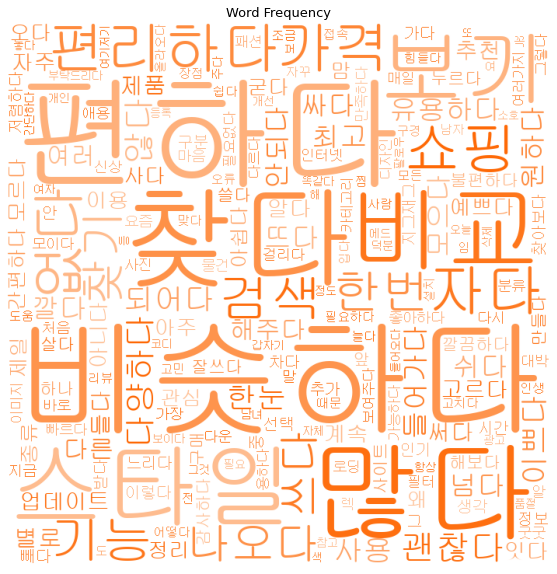

In [247]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.savefig('스타일닷컴.png')
plt.show

In [248]:
from konlpy.tag import Okt
okt = Okt()

stopwords = ['있다', '하다', '되다', '수', '것', '거', '경우', '수록', '설정', '더', '볼', '정말', '보고', '때', '점'
            , '용', '눈', '싶다', '짱', '게', '개', '내', '네' ,'을', '함', '다만', '돼다', '순', '가끔', '제', '굿'
            ,'좀', '여기', '곳', '일', '별', '뭐', '가요', '대다', '듯', '일', '과', '이다', '기다', '저', '그냥', '짱짱'
            , '이', '번', '요','진짜', '이제', '매우', '완전', '쇼핑몰', '상품', '좋다', '같다', '보다', '옷', '앱'
            , '어플', '브랜드']

def extract_tag3(string):
    
    result_words = []

    result = okt.pos(string, stem=True, norm=True)
    for word, tag in result:       
        if tag in ['Noun']:
            
            if word not in stopwords:
                if len(word) > 1:
                    result_words.append(word)
    return result_words


text_data = extract_tag3(text)
text_data

['업뎃',
 '정확성',
 '품절',
 '표시',
 '업뎃된',
 '스타일',
 '보이지',
 '찾기',
 '결과',
 '개수',
 '느낌',
 '가격',
 '만원',
 '단위',
 '튕기',
 '시작',
 '튕기',
 '다시',
 '천원',
 '단위',
 '오천원',
 '단위',
 '변경',
 '튕기',
 '세부',
 '기능',
 '진화',
 '피드백',
 '관심',
 '하트',
 '등록',
 '완료',
 '불편',
 '관심',
 '보관',
 '관리',
 '장점',
 '단점',
 '자체',
 '관심',
 '카테고리',
 '별로',
 '사용자',
 '직접',
 '자신',
 '스타일',
 '카테고리',
 '관리',
 '폴더',
 '형식',
 '관리',
 '보관',
 '카테고리',
 '선택',
 '중복',
 '신발',
 '가방',
 '한번',
 '중복',
 '선택',
 '각각',
 '사항',
 '선택',
 '장점',
 '필터',
 '중인',
 '보기',
 '상세',
 '검색',
 '가능',
 '중인',
 '보기',
 '사용',
 '다른',
 '본적',
 '기능',
 '카테고리',
 '상세',
 '검색',
 '활용',
 '제품',
 '찾기',
 '가능',
 '명품',
 '스펙트럼',
 '장점',
 '글자',
 '수제',
 '자체',
 '아이템',
 '검색',
 '기본',
 '기능',
 '구매',
 '품절',
 '목록',
 '그대로',
 '노출',
 '안내',
 '마치',
 '무한',
 '로딩',
 '데이터',
 '사용',
 '비량',
 '일단',
 '자체',
 '정리',
 '지그재그',
 '스타일',
 '해도',
 '과언',
 '정도',
 '차별',
 '추가',
 '소호',
 '구분',
 '때문',
 '사용',
 '한가지',
 '종종',
 '다른',
 '소호',
 '수가',
 '네이버',
 '하나',
 '하나',
 '반복',
 '가치',
 '여기저기',
 '군데',
 '편이',
 '검색',
 '통해',
 '도입',
 '요청',
 '별로',
 '효과',
 '시간',

In [249]:
#A = [a for a in noun if len(a) > 1] 

In [250]:
count = Counter(text_data)
count

Counter({'업뎃': 12,
         '정확성': 3,
         '품절': 16,
         '표시': 7,
         '업뎃된': 1,
         '스타일': 194,
         '보이지': 1,
         '찾기': 138,
         '결과': 2,
         '개수': 1,
         '느낌': 13,
         '가격': 165,
         '만원': 3,
         '단위': 3,
         '튕기': 4,
         '시작': 5,
         '다시': 31,
         '천원': 2,
         '오천원': 1,
         '변경': 4,
         '세부': 3,
         '기능': 153,
         '진화': 1,
         '피드백': 2,
         '관심': 54,
         '하트': 10,
         '등록': 16,
         '완료': 4,
         '불편': 4,
         '보관': 3,
         '관리': 11,
         '장점': 22,
         '단점': 6,
         '자체': 15,
         '카테고리': 27,
         '별로': 80,
         '사용자': 3,
         '직접': 7,
         '자신': 7,
         '폴더': 6,
         '형식': 1,
         '선택': 35,
         '중복': 2,
         '신발': 14,
         '가방': 5,
         '한번': 136,
         '각각': 7,
         '사항': 2,
         '필터': 26,
         '중인': 2,
         '보기': 185,
         '상세': 10,
         '검색': 157,
       

In [251]:
def color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({:d},{:d}%, {:d}%)".format(np.random.randint(24,25),np.random.randint(99,100),np.random.randint(50,80)))

In [252]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\gulim.ttc', width = 700, height = 700, background_color='white',color_func=color_func, random_state =1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

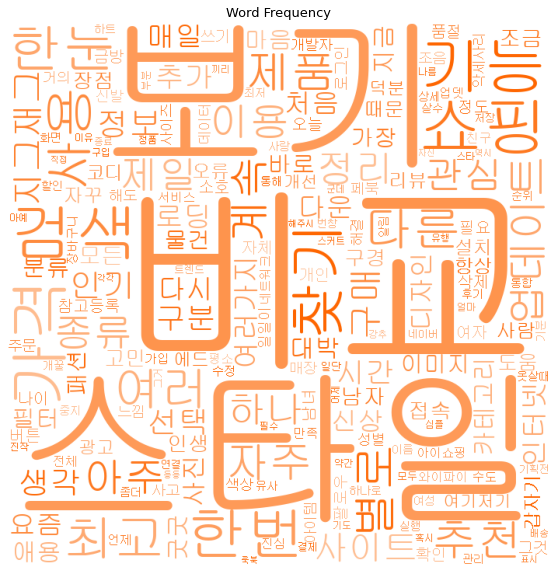

In [253]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size =13)
plt.savefig('스타일닷컴_명사.png')
plt.show